In [10]:
%matplotlib inline # jn에서 바로 보기 위해 써주는 부분
import matplotlib.pyplot as plt # pyplot은 그래프를 파일로 만들어주는 라이브러리
import pandas as pd

In [19]:
df = pd.read_csv('data/cluster2.csv')
print("Dimensions of the data = {}".format(df.shape))
df[:5]

Dimensions of the data = (1300, 2)


X         Y
0  1.070487  1.328147
1  1.072777  1.191249
2  0.328029  1.261713
3  0.600926  1.254465
4  0.759281  1.284541

In [7]:
# 모든 row, 마지막 column 제외
x = df.values[:, :-1]
x

array([[1.07048688],
       [1.07277723],
       [0.3280287 ],
       ...,
       [0.79848816],
       [0.64616521],
       [1.24581503]])

In [8]:
# 모든 row, 마지막 column만
y = df.values[:, -1]
y

array([1.3281469 , 1.19124898, 1.26171275, ..., 0.44262997, 0.41227532,
       0.7992118 ])

In [15]:
# 우리가 받은 자료는 마지막 column 삭제하지 않아도 됨
X = df.values
X

array([[1.07048688, 1.3281469 ],
       [1.07277723, 1.19124898],
       [0.3280287 , 1.26171275],
       ...,
       [0.79848816, 0.44262997],
       [0.64616521, 0.41227532],
       [1.24581503, 0.7992118 ]])

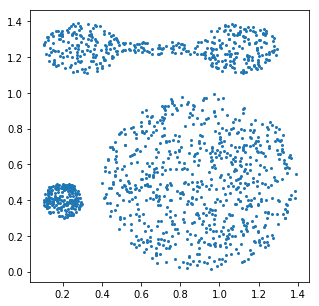

In [16]:
# plotting the dataset
plt.figure(figsize=(5, 5)) # width, height in inches
plt.scatter(X[:, 0], X[:, 1], s=4) # performs a scatter plot(x좌표, y좌표, s: 점 크기)
plt.show()

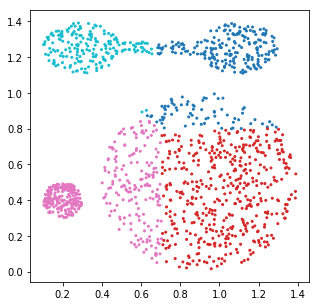

In [20]:
# K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
# object 생성
# n_clusters : cluster 개수
# randome_state : 설정하지 않아도 됨. 컴퓨터의 랜덤은 주기가 긴 함수일 뿐 실제로 랜덤인 건 아님. 이 시드함수를 어떻게 줄 지 설정하는 부분.
y_pred = kmeans.fit_predict(X)
# fit_predict 함수로 모델 동작

cmap = 'tab10'
# matplotlib.org 에서 취향에 맞는 colormap 찾아서 사용

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=4, c=y_pred, cmap=cmap)
plt.show()
# c :  cluster 정보를 color로 사용
# cmap : set the colormap

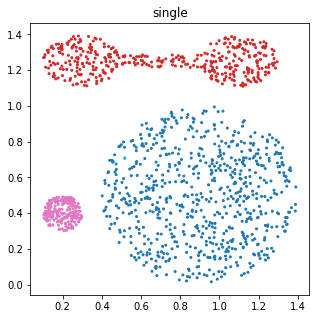

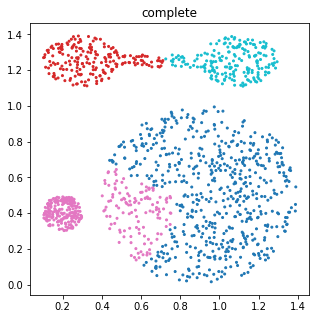

In [23]:
# Hierarchical Clustering : 가장 가까운 애들끼리 합쳐나간다. '가까운'을 알아내기 위해 거리를 설정하는 방법에 따라 달라짐
# enumerate를 이용하여 AgglomerativeClustering에서 link를 바꿔가며 해볼 것.
from sklearn.cluster import AgglomerativeClustering

for i, linkage in enumerate(("single", "complete")):
   clustering = AgglomerativeClustering(linkage = linkage, n_clusters=4) # linkage 넣어주기
   y_pred = clustering.fit_predict(X)
   plt.figure(i+1,figsize=(5,5)) # i+1번 figure
   plt.scatter(X[:,0], X[:,1], c=y_pred, s=4, cmap=cmap)
   plt.title(linkage) # figure에 title 지정
plt.show()

In [ ]:
# affinity도 변경 가능. default는 euclidean
'''
affinity : string or callable, default: “euclidean”
Metric used to compute the linkage. 
Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. 
If linkage is “ward”, only “euclidean” is accepted. 
If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
'''
# linkage : single, complete, average, ward(표준편차를 적게 해주는 방법) 제공

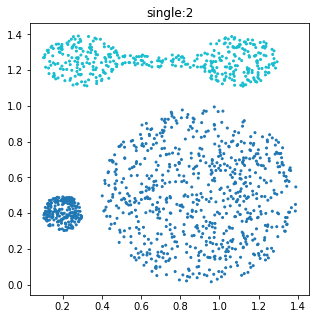

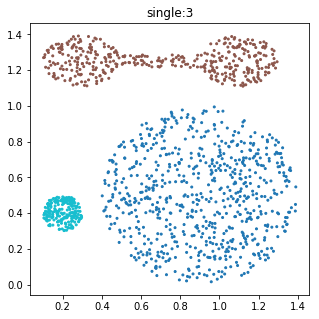

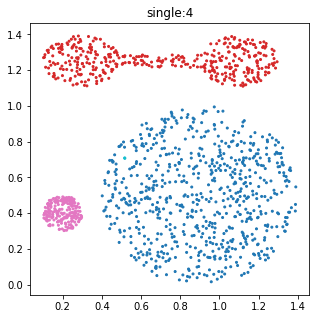

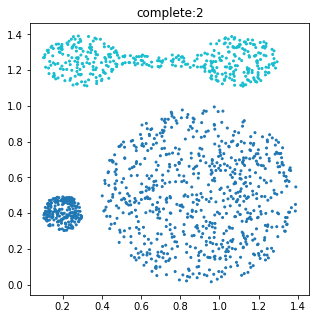

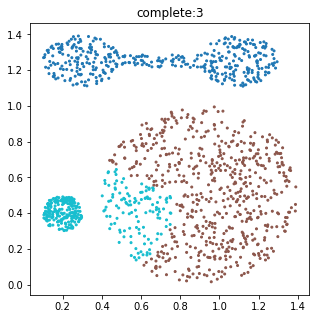

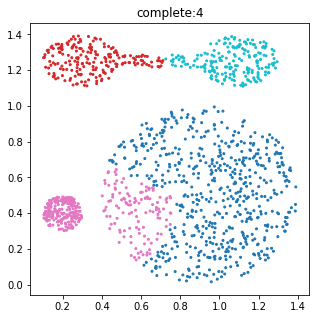

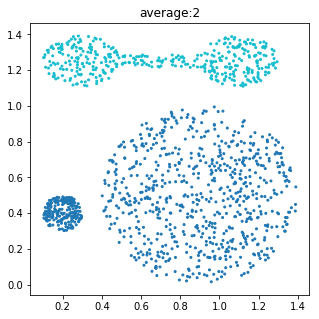

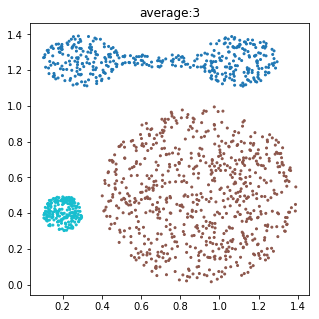

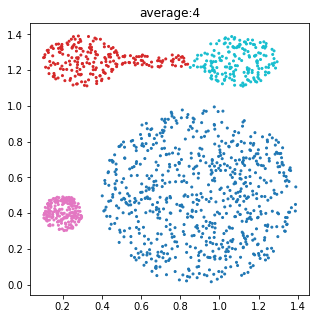

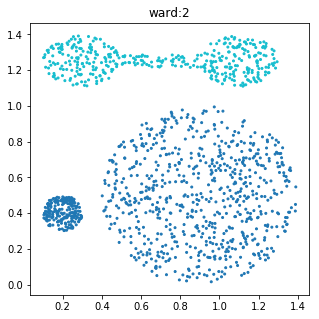

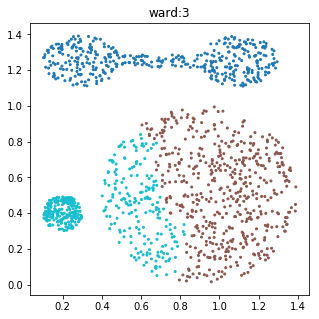

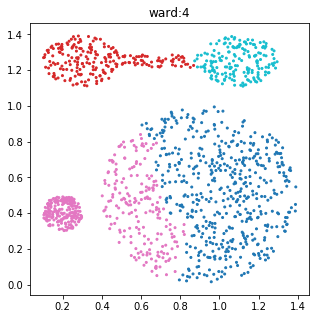

In [25]:
# 연습문제
for i, linkage in enumerate(("single", "complete", "average", "ward")):
    for j in range(2, 5):
       clustering = AgglomerativeClustering(linkage = linkage, n_clusters=j)
       y_pred = clustering.fit_predict(X)
       plt.figure(i*10+j,figsize=(5,5))
       plt.scatter(X[:,0], X[:,1], c=y_pred, s=4, cmap=cmap)
       plt.title("{}:{}".format(linkage, j))
plt.show()

In [27]:
from sklearn.cluster import DBSCAN

# metric으로 distance metric 변경 가능. 기본은 euclidean
dbscan = DBSCAN(eps=0.05, min_samples=20)
y_pred = dbscan.fit_predict(X)
print(y_pred[:10])
# outlier : -1

[ 0  4 -1 -1 -1 -1 -1 -1 -1 -1]


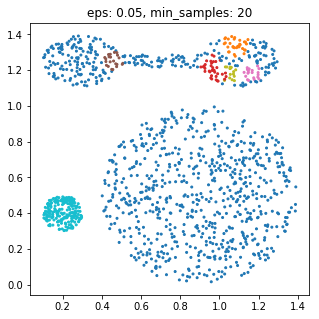

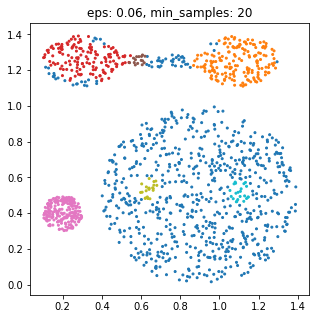

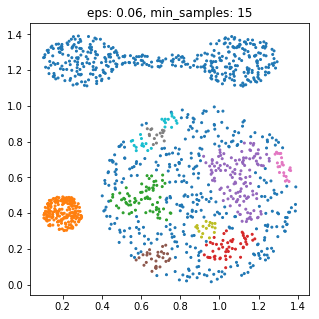

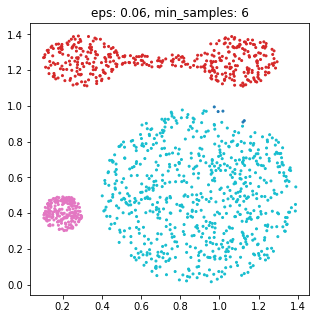

In [30]:
for i, (eps, min_samples) in enumerate(((0.05, 20), (0.06, 20), (0.06, 15), (0.06, 6))):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)
    plt.figure(i*10+j,figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=y_pred, s=4, cmap=cmap)
    plt.title("eps: {}, min_samples: {}".format(eps, min_samples))
plt.show()

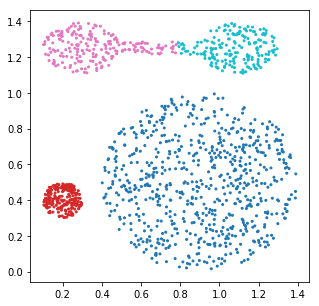

[0.54305501 0.15217282 0.15989176 0.14488041]
[[0.90092247 0.49695211]
 [0.20256314 0.40738658]
 [0.37381659 1.25479151]
 [1.07851102 1.24600705]]


In [32]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=4, max_iter=20, random_state=0) # max_iter: 무의미한 cluster 이동을 방지하고자 설정
y_pred = em.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=4, c=y_pred, cmap=cmap)
plt.show()

In [33]:
print(em.weights_) # 각 cluster를 만드는 정규분포가 선택될 확률
print(em.means_) # 각 cluster가 만드는 각 좌표의 평균
print(em.covariances_) # x 자체의, y 자체의 variance, x-y 상관관계

[0.54305501 0.15217282 0.15989176 0.14488041]
[[0.90092247 0.49695211]
 [0.20256314 0.40738658]
 [0.37381659 1.25479151]
 [1.07851102 1.24600705]]
[[[ 6.49289207e-02 -4.78095962e-04]
  [-4.78095962e-04  6.03293794e-02]]

 [[ 2.73531910e-03 -7.02052996e-05]
  [-7.02052996e-05  2.51901315e-03]]

 [[ 3.12803346e-02 -5.83851370e-04]
  [-5.83851370e-04  4.11677639e-03]]

 [[ 1.44971509e-02  4.61343042e-04]
  [ 4.61343042e-04  5.12229085e-03]]]


* parameters
n_components
max_iter
covariance_type
- full (default) : all component has its own covariance matrix
- tied : all components share the same general covariance matrix
- diag : each component has its own diagonal covariance matrix (상관관계 없이 각각의 covariance만)
- spherical : each component has its own single variance

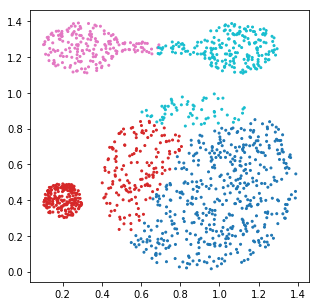

[0.36520174 0.27506535 0.14819766 0.21153526]
[[1.01300031 0.41625639]
 [0.37325601 0.47736082]
 [0.34563819 1.25471396]
 [1.00341826 1.15228871]]
[[0.03689517 0.01323168]
 [0.01323168 0.03045924]]


In [34]:
em = GaussianMixture(n_components=4, max_iter=20, covariance_type="tied", random_state=0) # max_iter: 무의미한 cluster 이동을 방지하고자 설정
y_pred = em.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=4, c=y_pred, cmap=cmap)
plt.show()

print(em.weights_)
print(em.means_)
print(em.covariances_)